In [5]:
# Entrega hecha por Carlos Martín Sanz DNI: 12435207G

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -------------------------------------------------------------

### PARTE 1

# -------------------------------------------------------------

In [6]:
# Primero cargamos el dataset, el de digitos manuscritos

dataset = load_digits()
print(dataset)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [7]:
# Al abrir el archivo se nos abre sin nombre de las columnas, por tanto
# como lo vamos a necesitar, he buscado en internet este dataset,
# y en un github he encontrado el codigo que autogenera los nombres.

nombresCol = [
        "pixel_{}_{}".format(row_idx, col_idx)
        for row_idx in range(8)
        for col_idx in range(8)
    ]

nombresCol

# Enlace al github:

# https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/datasets/_base.py#L787

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [10]:
# Para poder utilizarlo creo un dataframe que contiene los datos
x = dataset.data
datos = pd.DataFrame (x,columns=nombresCol)
datos

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
# Definimos la escala que utilizamos

es = MinMaxScaler()

X = es.fit_transform(dataset.data)
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [12]:
# Definimos la meta (targets del dataset)

y = dataset.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
# Variables de entrenamiento y prueba, separando el conjunto de 
# entrenamiento y prueba con la razon habitual de 2/3 1/3

Xentrenamiento, Xprueba, yentrenamiento, yprueba = train_test_split(X, y, test_size = 0.33, stratify=y)

# De esta forma cada vez que se ejecute, puesto que coge conjuntos distintos, va a salir distintos resultados
# para usar una semilla se añadiria el atributo:
#
#    random_state= numeroentero
#
# de esta forma siempre cogera la misma semilla y por tanto los mismos conjuntos de datos

In [14]:
# Para ver si he hecho bien los conjuntos imprimo la longitud de 
# las variables, como todas las instancias suman 1796, tiene que 
# haber 1203 de entrenamiento y 594 de prueba

Xentrenamiento.shape,yentrenamiento.shape,Xprueba.shape,yprueba.shape

((1203, 64), (1203,), (594, 64), (594,))

In [15]:
# Creo un array donde guardo las tasas de error

tasa_aciertos = []
for k in range(1,16):
    clf = KNeighborsClassifier(n_neighbors = k , algorithm='brute')
    clf.fit(Xentrenamiento, yentrenamiento)
    tasa_aciertos.append(clf.score(Xprueba,yprueba))

In [16]:
print(tasa_aciertos)

[0.9764309764309764, 0.9730639730639731, 0.9781144781144782, 0.9747474747474747, 0.9781144781144782, 0.9747474747474747, 0.9781144781144782, 0.9713804713804713, 0.9747474747474747, 0.968013468013468, 0.9713804713804713, 0.9663299663299664, 0.9629629629629629, 0.9663299663299664, 0.9629629629629629]


Text(0, 0.5, 'Tasa de aciertos')

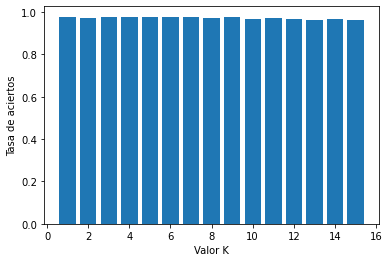

In [17]:
# Creo el grafico de barra con los datos de la tasa de aciertos para
# cada k y asigno etiquetas a los ejes

fig, barras =plt.subplots()
barras.bar(x=np.arange(1, 16), height=tasa_aciertos)
barras.set_xlabel('Valor K')
barras.set_ylabel('Tasa de aciertos')

In [18]:
# Obtengo el valor maximo 

valorMaximo = max(tasa_aciertos)

In [19]:
# Printeo el valor maximo del array de tasas y a que valor de k se 
# asocia este

print("La tasa maxima de error es: ", valorMaximo,
      " y se consigue con el valor de k = ", tasa_aciertos.index(valorMaximo)+1)

La tasa maxima de error es:  0.9781144781144782  y se consigue con el valor de k =  3


# -------------------------------------------------------------

### PARTE 2


# -------------------------------------------------------------

In [20]:
datos.replace({0.0: 0, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1 , 6.0: 1, 7.0: 1, 8.0:1, 9.0: 1, 10.0: 1, 11.0: 1,
              12.0: 1, 13.0: 1, 14.0: 1, 15.0: 1 ,16.0: 1})

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1793,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1794,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1795,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [21]:
# Convertimos los datos 0.0 a 0 y los > 0.0 a 1 con valores enteros

X = np.array(dataset.data != 0, dtype=int)
print(X)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 1 1 0]]


In [22]:
# Variables de entrenamiento y prueba, separando el conjunto de 
# entrenamiento y prueba con la razon habitual de 2/3 1/3

Xentrenamiento, Xprueba, yentrenamiento, yprueba = train_test_split(X, y, test_size=0.33, stratify=y)

# De esta forma cada vez que se ejecute, puesto que coge conjuntos distintos, va a salir distintos resultados
# para usar una semilla se añadiria el atributo:
#
#    random_state= numeroentero
#
# de esta forma siempre cogera la misma semilla y por tanto los mismos conjuntos de datos

In [23]:
# Para ver si he hecho bien los conjuntos imprimo la longitud de 
# las variables, como todas las instancias suman 1796, tiene que 
# haber 1203 de entrenamiento y 594 de prueba

Xentrenamiento.shape,yentrenamiento.shape,Xprueba.shape,yprueba.shape

((1203, 64), (1203,), (594, 64), (594,))

In [24]:
# Hacemos lo mismo de antes solo que ahora son distintos los datos

tasa_aciertos = []
for k in range(1,16):
    clf = KNeighborsClassifier(n_neighbors = k , algorithm='brute')
    clf.fit(Xentrenamiento, yentrenamiento)
    tasa_aciertos.append(clf.score(Xprueba,yprueba))

In [25]:
print(tasa_aciertos)

[0.8737373737373737, 0.8838383838383839, 0.8888888888888888, 0.9023569023569024, 0.8956228956228957, 0.9090909090909091, 0.9023569023569024, 0.8956228956228957, 0.9141414141414141, 0.9074074074074074, 0.9124579124579124, 0.9107744107744108, 0.9107744107744108, 0.9074074074074074, 0.9141414141414141]


Text(0, 0.5, 'Tasa de aciertos')

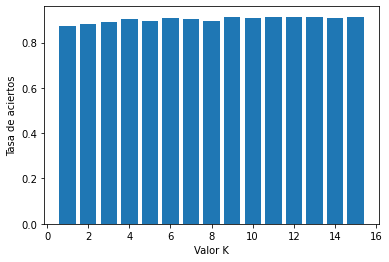

In [26]:
# Al igual que antes creo el grafico de barras, con las etiquetas

fig, barras =plt.subplots()
barras.bar(x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], height=tasa_aciertos)
barras.set_xlabel('Valor K')
barras.set_ylabel('Tasa de aciertos')

In [27]:
# Obtengo el valor maximo 

valorMaximo = max(tasa_aciertos)

In [28]:
# Por ultimo igual que en la parte 1, decir cual es el valor maximo y para que valor de k se consigue

print("La tasa maxima de error es: ", valorMaximo,
      " y se consigue con el valor de k = ", tasa_aciertos.index(valorMaximo)+1)

La tasa maxima de error es:  0.9141414141414141  y se consigue con el valor de k =  9


In [29]:
# La magnitud de cada atributo (pixel) sería la intensidad en una escala
# de grises que va desde cero (pixel en blanco), hasta un valor máximo que depende de la
# implementación (DESCR)

print("Como viene aqui image in the range 0..16")
print('\n')
print('\n')
print('\n')
print(dataset.DESCR)

Como viene aqui image in the range 0..16






.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 